# Minería de datos mediante el proceso SEMMA

# Paso 1: muestra

## 1.1 Cargue el conjunto de datos.


Cargue el conjunto de datos. Comprueba su tamaño. Eche un vistazo preliminar a los datos. Muestreo de los datos si es necesario. Dividirlo en conjuntos de entrenamiento y validación.
- 1.1 Cargar el conjunto de datos Primero, descomprimamos el archivo proporcionado y carguemos el conjunto de datos.

In [ ]:
# -----------------------------------------
# Paso 1: Muestra (sin submuestreo)
# -----------------------------------------

# 📦 Importación de librerías
import pandas as pd
import numpy as np

# 📥 Leer el archivo Excel
df = pd.read_excel("/content/Ejercicio_Aplicacion_SEMMA.xlsx")

# 🔍 Mostrar tamaño y primeras filas del conjunto de datos
print(f"✅ Conjunto de datos cargado correctamente.")
print(f"➡️ Filas: {df.shape[0]}  |  Columnas: {df.shape[1]}")
df.head()


✅ Conjunto de datos cargado correctamente.
➡️ Filas: 18484  |  Columnas: 31


,CustomerKey,GeographyKey,CustomerAlternateKey,Title,FirstName,MiddleName,LastName,NameStyle,BirthDate,MaritalStatus,...,FrenchOccupation,HouseOwnerFlag,NumberCarsOwned,AddressLine1,AddressLine2,Phone,DateFirstPurchase,CommuteDistance,Region,BikeBuyer
0,11000,26,AW00011000,NaN,Jon,V,Yang,0,1986-10-06,M,...,Cadre,1,0,3761 N. 14th St,NaN,1 (11) 500 555-0162,2011-01-19,1-2 Miles,Pacific,1
1,11001,37,AW00011001,NaN,Eugene,L,Huang,0,1991-05-10,S,...,Cadre,0,1,2243 W St.,NaN,1 (11) 500 555-0110,2011-01-15,0-1 Miles,Pacific,1
2,11002,31,AW00011002,NaN,Ruben,NaN,Torres,0,1986-02-09,M,...,Cadre,1,1,5844 Linden Land,NaN,1 (11) 500 555-0184,2011-01-07,2-5 Miles,Pacific,1
3,11003,11,AW00011003,NaN,Christy,NaN,Zhu,0,1988-08-14,S,...,Cadre,0,1,1825 Village Pl.,NaN,1 (11) 500 555-0162,2010-12-29,5-10 Miles,Pacific,1
4,11004,19,AW00011004,NaN,Elizabeth,NaN,Johnson,0,1994-08-05,S,...,Cadre,1,4,7553 Harness Circle,NaN,1 (11) 500 555-0131,2011-01-23,1-2 Miles,Pacific,1


- CustomerKey: Identificador único para cada cliente
- Geography: Ubicación geográfica del cliente (país, región, etc.)
- CustomerAlternateKey: Clave alternativa del cliente utilizada en ciertos sistemas.
- Title, titulo del cliente.
- FirstName, primer nombre del cliente.
- MiddleName, segundo nombre del cliente.
- LastName, apellido del cliente.
- NameStyle
- BirthDate, fecha de nacimiento.
- MaritalStatus, estado civil del cliente.
- Suffix, sufijo del cliente.
- Gender, genero del cliente.
- EmailAddress, correo del cliente.
- YearlyIncome, ingreso anual del cliente.
- TotalChildren, total de hijos.
- NumberChildrenAtHome, total de hijos en casa.
- EnglishEducation, nivel de educacion ingles.
- SpanishEducation, nivel de educacion en español.
- FrenchEducation, nivel de educacion en frances.
- EnglishOccupation, ocupacion en ingles.
- SpanishOccupation, ocupacion en español.
- FrenchOccupation, ocupacion en frances.
- HouseOwnerFlag, indicador de casa propia.
- NumberCarsOwned, numero de carros que le pertenecen.
- AddressLine1, linea 1 de direccion.
- AddressLine2, linea 2 de direccion.
- Phone, telefono.
- DateFirstPurchase, fecha de la primera compra.
- CommuteDistance, distancia de viaje.
- Region
- BikeBuyer, bicicletas compradas.



## 1.2 Verificar el tamaño del conjunto de datos
- A continuación, verifiquemos el tamaño del conjunto de datos.

In [ ]:
# Verificar el tamaño del conjunto de datos
rows, columns = df.shape  # 'df' es el DataFrame que cargaste previamente
print(f"El conjunto de datos tiene {rows} filas y {columns} columnas.")

El conjunto de datos tiene 18484 filas y 31 columnas.


## 1.3 Partición de datos
- Para asegurarnos de tener un conjunto para validar nuestro modelo más adelante, debemos dividir los datos en un conjunto de entrenamiento y un conjunto de validación (o prueba). Una práctica común es asignar entre el 70% y el 80% de los datos para capacitación y el resto para validación. Para este análisis, utilicemos una división 80-20.

In [ ]:
from sklearn.model_selection import train_test_split

# División de los datos en conjuntos de entrenamiento y validación (80-20 split)
train_data, validation_data = train_test_split(df, test_size=0.2, random_state=42)

# Verificar el tamaño de los conjuntos de entrenamiento y validación
train_size = train_data.shape[0]
validation_size = validation_data.shape[0]

print(f"El conjunto de entrenamiento tiene {train_size} registros.")
print(f"El conjunto de validación tiene {validation_size} registros.")

El conjunto de entrenamiento tiene 14787 registros.
El conjunto de validación tiene 3697 registros.


- Conjunto de entrenamiento: 14,787 entradas Conjunto de validación: 3,967 entradas Una vez completado el paso "Muestra", pasaremos a la fase "Explorar", donde analizaremos la distribución, las estadísticas y las visualizaciones del conjunto de datos para comprender mejor su estructura y características.

# Paso 2: explorar
- Calcular estadísticas resumidas. Visualice la distribución de características clave. Compruebe si hay anomalías en los datos, como valores faltantes y valores atípicos.
- 2.1 Estadísticas resumidas

In [ ]:
# Computing summary statistics for the training data
summary_statistics = train_data.describe()

summary_statistics

,CustomerKey,GeographyKey,NameStyle,BirthDate,YearlyIncome,TotalChildren,NumberChildrenAtHome,HouseOwnerFlag,NumberCarsOwned,DateFirstPurchase,BikeBuyer
count,14787.000000,14787.000000,14787.0,14787,14787.000000,14787.000000,14787.000000,14787.000000,14787.000000,14787,14787.000000
mean,20243.677216,257.966930,0.0,1984-05-03 13:55:03.469263616,57426.117536,1.844187,1.000812,0.673835,1.491986,2013-02-15 18:43:53.718806784,0.494962
min,11001.000000,2.000000,0.0,1931-02-10 00:00:00,10000.000000,0.000000,0.000000,0.000000,0.000000,2010-12-29 00:00:00,0.000000
25%,15591.500000,62.000000,0.0,1976-10-20 00:00:00,30000.000000,0.000000,0.000000,0.000000,1.000000,2012-10-14 00:00:00,0.000000
50%,20235.000000,241.000000,0.0,1986-07-13 00:00:00,60000.000000,2.000000,0.000000,1.000000,2.000000,2013-05-04 00:00:00,0.000000
75%,24902.500000,345.000000,0.0,1993-08-12 00:00:00,70000.000000,3.000000,2.000000,1.000000,2.000000,2013-09-11 00:00:00,1.000000
max,29483.000000,654.000000,0.0,2001-06-25 00:00:00,170000.000000,5.000000,5.000000,1.000000,4.000000,2014-01-28 00:00:00,1.000000
std,5354.650618,195.845059,0.0,NaN,32213.567341,1.608996,1.520721,0.468824,1.140353,NaN,0.499992


- 2.2 Visualización

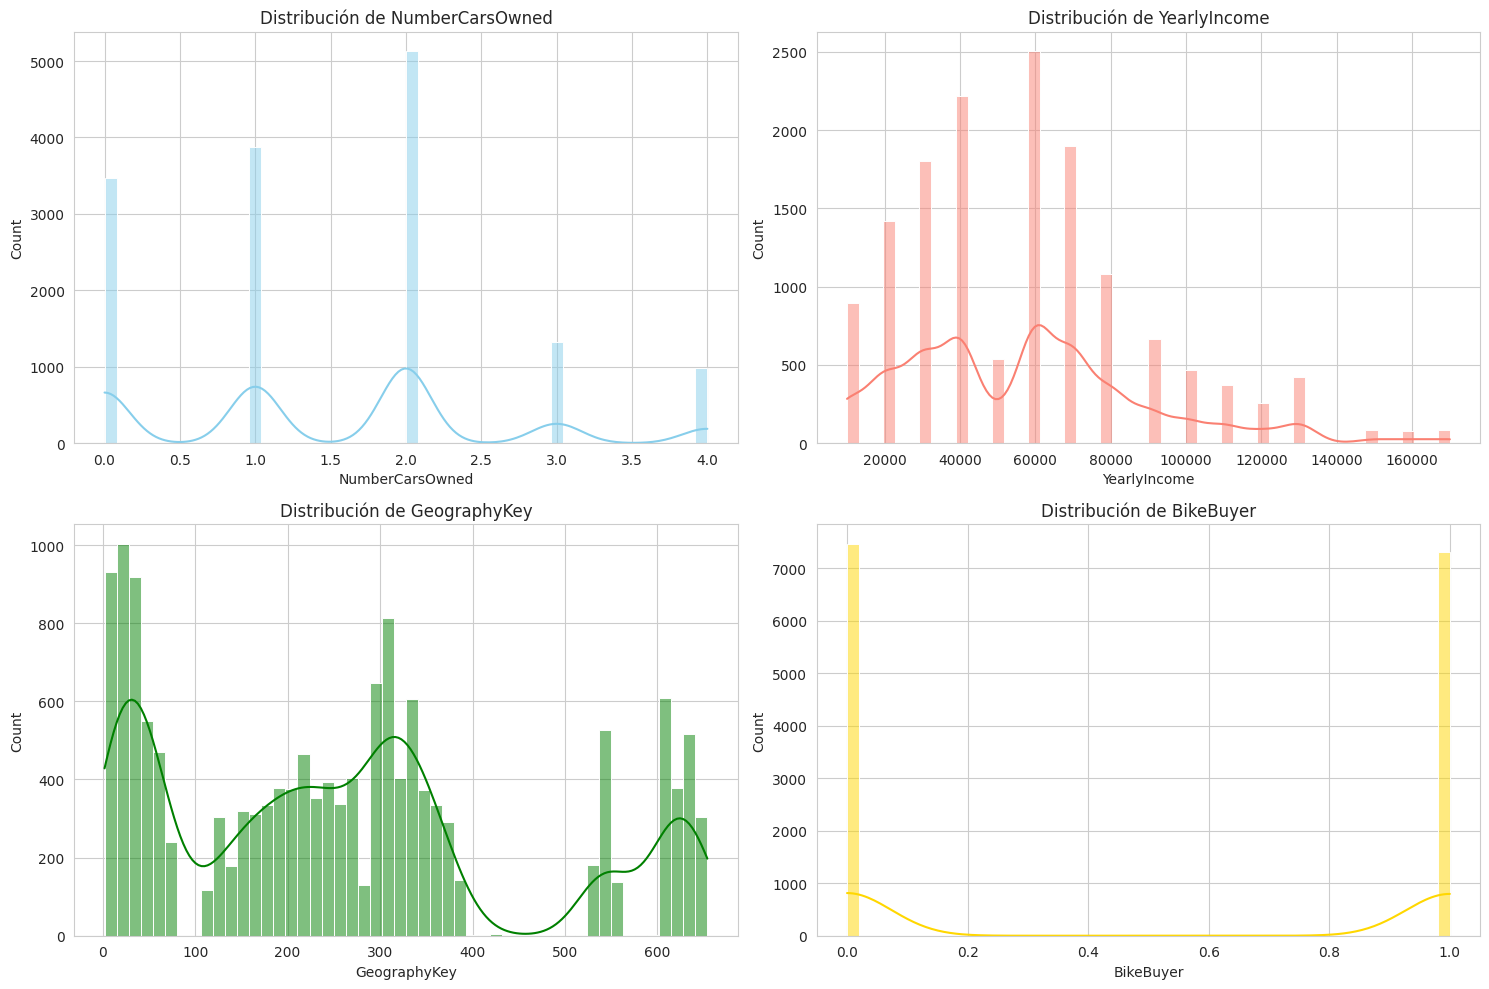

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Inicializar la figura
plt.figure(figsize=(15, 10))

# Subgráfico para 'NumberCarsOwned'
plt.subplot(2, 2, 1)
sns.histplot(train_data['NumberCarsOwned'], bins=50, color='skyblue', kde=True)
plt.title('Distribución de NumberCarsOwned')

# Subgráfico para 'YearlyIncome'
plt.subplot(2, 2, 2)
sns.histplot(train_data['YearlyIncome'], bins=50, color='salmon', kde=True)
plt.title('Distribución de YearlyIncome')

# Subgráfico para 'GeographyKey'
plt.subplot(2, 2, 3)
sns.histplot(train_data['GeographyKey'], bins=50, color='green', kde=True)
plt.title('Distribución de GeographyKey')

# Subgráfico para 'BikeBuyer'
plt.subplot(2, 2, 4)
sns.histplot(train_data['BikeBuyer'], bins=50, color='gold', kde=True)
plt.title('Distribución de BikeBuyer')

# Ajustar diseño
plt.tight_layout()
plt.show()

- A continuación se muestran los histogramas que ilustran las distribuciones de características continuas clave:

- NumberCarsOwned: La mayoría de las personas en el conjunto de datos posee entre 0 y 2 automóviles. Hay un notable pico alrededor del valor 0, lo que sugiere que una gran proporción de los individuos no posee un automóvil.

- YearlyIncome: La distribución de ingresos anuales muestra una gran concentración entre los rangos más bajos, específicamente entre 30,000 y 70,000 unidades monetarias.

- GeographyKey: La distribución de esta columna refleja cómo los registros están relacionados con diferentes regiones geográficas.

- BikeBuyer: La proporción de compradores de bicicletas en el conjunto de datos parece equilibrada, con valores cercanos al 50%. Esto indica que el interés en adquirir bicicletas es bastante homogéneo entre los individuos analizados.


<ipython-input-6-889f5e79f727>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='EnglishEducation', order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree'], palette='Blues_r', legend=False)
<ipython-input-6-889f5e79f727>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_data, x='SpanishEducation', order=['Educación secundaria (en curso)','Educación secundaria','Estudios universitarios (en curso)','Licenciatura','Estudios de postgrado'], palette='Greens_r', legend=False)
<ipython-input-6-889f5e79f727>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `

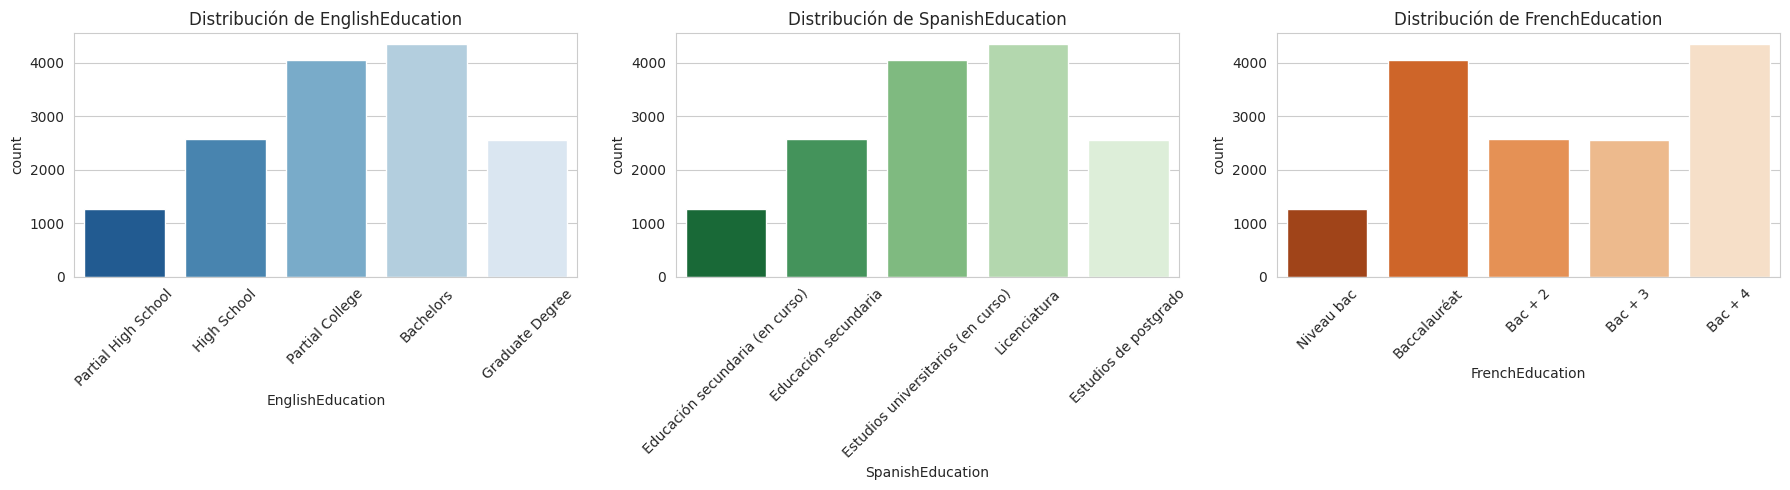

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configurar estilo de los gráficos
sns.set_style("whitegrid")

# Inicializar la figura
plt.figure(figsize=(18, 5))

# Subgráfico para 'EnglishEducation'
plt.subplot(1, 3, 1)
sns.countplot(data=train_data, x='EnglishEducation', order=['Partial High School','High School','Partial College','Bachelors','Graduate Degree'], palette='Blues_r', legend=False)
plt.title('Distribución de EnglishEducation')
plt.xticks(rotation=45)

# Subgráfico para 'SpanishEducation'
plt.subplot(1, 3, 2)
sns.countplot(data=train_data, x='SpanishEducation', order=['Educación secundaria (en curso)','Educación secundaria','Estudios universitarios (en curso)','Licenciatura','Estudios de postgrado'], palette='Greens_r', legend=False)
plt.title('Distribución de SpanishEducation')
plt.xticks(rotation=45)

# Subgráfico para 'FrenchEducation'
plt.subplot(1, 3, 3)
sns.countplot(data=train_data, x='FrenchEducation', order=['Niveau bac','Baccalauréat','Bac + 2','Bac + 3','Bac + 4'], palette='Oranges_r', legend=False)
plt.title('Distribución de FrenchEducation')
plt.xticks(rotation=45)

# Ajustar diseño
plt.tight_layout()
plt.show()

- Aquí están las distribuciones de las variables categóricas:

- EnglishEducation: Este gráfico muestra la distribución de niveles educativos relacionados con el idioma inglés. Permite identificar patrones o diferencias entre los registros que han recibido educación en inglés.

- SpanishEducation: Este gráfico refleja cómo se distribuyen los niveles educativos en español entre los individuos de la base de datos. Esto puede ser útil para analizar habilidades lingüísticas en ese idioma.

- FrenchEducation: Aquí se presentan los niveles educativos relacionados con el idioma francés. Ayuda a comprender cómo están agrupadas las personas según su formación en este idioma.

- 2.3 Anomalías de datos
- A continuación, debemos investigar posibles anomalías, como:

In [ ]:
# Contando valores nulos y frecuencias inesperadas en las columnas categóricas
invalid_values = {
    'EnglishEducation_nulls': train_data['EnglishEducation'].isnull().sum(),
    'SpanishEducation_nulls': train_data['SpanishEducation'].isnull().sum(),
    'FrenchEducation_nulls': train_data['FrenchEducation'].isnull().sum()
}

# Mostrando los resultados
invalid_values

{'EnglishEducation_nulls': np.int64(0),
 'SpanishEducation_nulls': np.int64(0),
 'FrenchEducation_nulls': np.int64(0)}

In [ ]:
# Comprobando valores faltantes en el conjunto de datos de entrenamiento
valores_faltantes = train_data.isnull().sum()

valores_faltantes

,0
CustomerKey,0
GeographyKey,0
CustomerAlternateKey,0
Title,14708
FirstName,0
MiddleName,6254
LastName,0
NameStyle,0
BirthDate,0
MaritalStatus,0


- Faltan valores en algunas columnas.


# Paso 3: modificar
- En esta fase, abordaremos las anomalías de los datos y los prepararemos para el modelado. Específicamente, haremos:
- 3.1 Revisaremos los datos de las columnas "Title", "MiddleName", "Suffix" y "AddressLine2" y observamos que esta informacion no esta relacionada con la variable objetivo, ademas de que alguna de ellas le falta mas del 95% de los datos, por lo que las eliminaremos.
- Eliminar las columnas irrelevantes.

In [ ]:
# Eliminamos las columnas irrelevantes
train_data.drop(columns=['CustomerAlternateKey','Title','FirstName','MiddleName','LastName','NameStyle','Suffix','EmailAddress','AddressLine1','AddressLine2','Phone'], inplace=True)
validation_data.drop(columns=['CustomerAlternateKey','Title','FirstName','MiddleName','LastName','NameStyle','Suffix','EmailAddress','AddressLine1','AddressLine2','Phone'], inplace=True)

# Comprobando valores faltantes en el conjunto de datos de entrenamiento
valores_faltantes = train_data.isnull().sum()

valores_faltantes

,0
CustomerKey,0
GeographyKey,0
BirthDate,0
MaritalStatus,0
Gender,0
YearlyIncome,0
TotalChildren,0
NumberChildrenAtHome,0
EnglishEducation,0
SpanishEducation,0


- Las columnas irrelevantes se han eliminado.
- 3.2 Ingeniería de características Teniendo en cuenta el conjunto de datos, una característica potencial que podemos diseñar es la edad de los clientesdado por la fórmula:

- Age = (fecha_actual - BirthDate).dt.days / 365.25

- AgeFirtsPurchase = (Fecha_actual - DateFirstPurchase).dt.days / 365.25

- Esta característica podría ayudar a segmentar mejor la preferencia respecto a la edad.
- Creemos esta nueva característica.

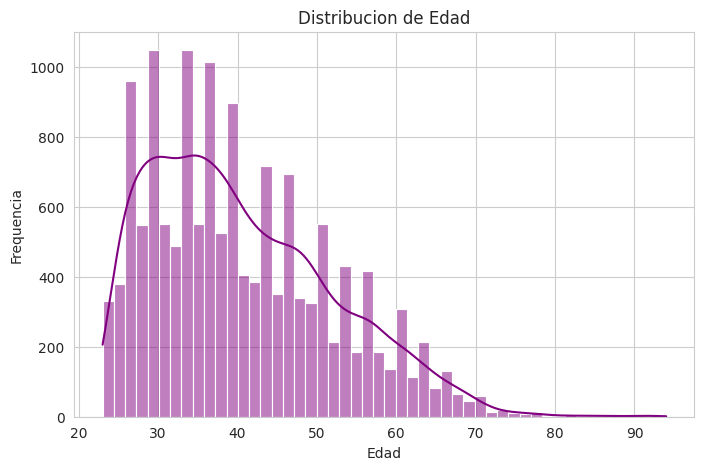

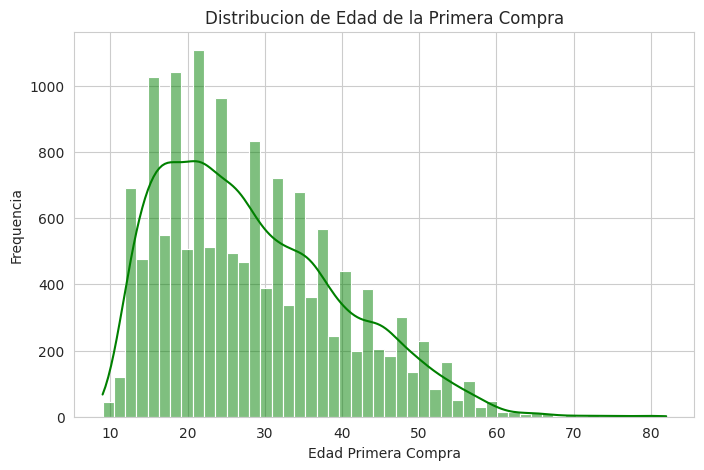

In [ ]:
import pandas as pd

# Creando la nueva caracteristica 'Age'
fecha_actual = pd.Timestamp('now')

train_data['Age'] = (fecha_actual - train_data['BirthDate']).dt.days // 365.25
validation_data['Age'] = (fecha_actual - validation_data['BirthDate']).dt.days // 365.25

train_data['AgeFirstPurchase'] = (train_data['DateFirstPurchase'] - train_data['BirthDate']).dt.days // 365.25
validation_data['AgeFirstPurchase'] = (validation_data['DateFirstPurchase'] - validation_data['BirthDate']).dt.days // 365.25

#train_data = pd.get_dummies(train_data, columns=['MaritalStatus'], drop_first=True)
#validation_data = pd.get_dummies(validation_data, columns=['MaritalStatus'], drop_first=True)

#train_data = pd.get_dummies(train_data, columns=['Gender'], drop_first=True)
#validation_data = pd.get_dummies(validation_data, columns=['Gender'], drop_first=True)

# Visualización de la distribución de la nueva caracteristica 'Age'
plt.figure(figsize=(8, 5))
sns.histplot(train_data['Age'], bins=50, color='purple', kde=True)
plt.title('Distribucion de Edad')
plt.xlabel('Edad')
plt.ylabel('Frequencia')
plt.show()

# Visualización de la distribución de la nueva caracteristica 'AgeFirstPurchase'
plt.figure(figsize=(8, 5))
sns.histplot(train_data['AgeFirstPurchase'], bins=50, color='green', kde=True)
plt.title('Distribucion de Edad de la Primera Compra')
plt.xlabel('Edad Primera Compra')
plt.ylabel('Frequencia')
plt.show()


- Aquí está la distribución de la característica de edad recientemente diseñada, que representa la edad del cliente. La mayoría de los clientes tienen una edad concentrado en el rango inferior entre 24 y 50 años.

- Con esto, hemos completado el paso “Modificar” del proceso SEMMA. La siguiente fase es "Modelo", donde elegiremos un modelo apropiado, lo entrenaremos utilizando nuestros datos de entrenamiento y validaremos su rendimiento.

# Paso 4: modelo
- Elija un modelo apropiado. Entrene el modelo utilizando los datos de entrenamiento. Validar su desempeño en el conjunto de validación. Dada la naturaleza del conjunto de datos y nuestra variable objetivo (BikeBuyer), este es un problema de clasificacion binaria.
- Queremos predecir el BikeBuyer de un cliente en función de sus características.
- Un modelo de clasificación comúnmente utilizado es el Random Forest Clasified, que es un modelo versátil y potente que a menudo funciona bien en este tipo de tareas.

# 4.1 Selección y capacitación del modelo
## Caso 1: Random Forest Clasified
- Comencemos seleccionando el Random Forest Clasified, entrenándolo usando nuestros datos de entrenamiento y luego validando su desempeño en el conjunto de validación.
- Primero, prepararemos nuestros datos separando los predictores y la variable objetivo (BikeBuyer). Luego, entrenaremos el modelo.

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1884
           1       0.89      0.87      0.88      1813

    accuracy                           0.88      3697
   macro avg       0.88      0.88      0.88      3697
weighted avg       0.88      0.88      0.88      3697



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

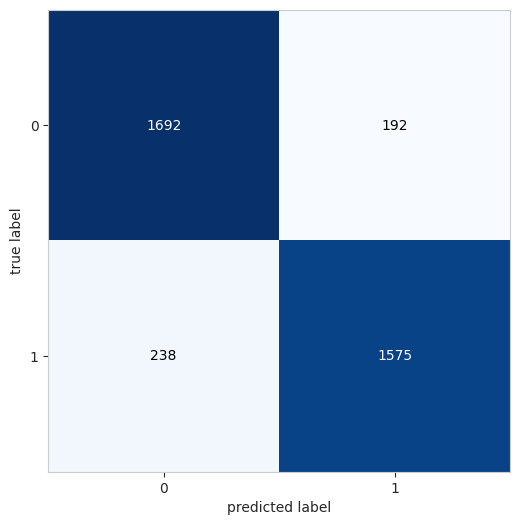

In [ ]:
# prompt: Entrenar random forest Clasified

import pandas as pd
# Assuming 'BikeBuyer' is the target variable for classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_confusion_matrix

# Separating predictors and target variable for training data
X_train = train_data.drop(columns=['BikeBuyer','BirthDate','DateFirstPurchase'])
y_train = train_data['BikeBuyer']

# Encoding categorical and datetime features
for col in X_train.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_train[col] = le.fit_transform(X_train[col])

# Training the Random Forest Classifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1042)
rf_classifier.fit(X_train, y_train)

# Preparing the validation data similarly
X_validation = validation_data.drop(columns=['BikeBuyer','BirthDate','DateFirstPurchase'])
y_validation = validation_data['BikeBuyer']

# Encoding categorical features in the validation set using the same encoding as the training set
for col in X_validation.select_dtypes(include=['object', 'category']).columns:
    le = LabelEncoder()
    X_validation[col] = le.fit_transform(X_validation[col])

# Aligning the columns of the training and validation sets
X_validation = X_validation.reindex(columns=X_train.columns, fill_value=0)

# Predicting on the validation set
y_pred = rf_classifier.predict(X_validation)

# Evaluating the model
print(classification_report(y_validation, y_pred))

matriz = confusion_matrix(y_validation, y_pred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)


- El rendimiento del modelo Random Forest Clasified en el conjunto de validación es el siguiente:

- Presicion: 0.88 (88%)

- Promedio macro (Macro AVG): 0.88

- Promedio ponderado (weighted avg): 0.88

- Verdaderos Negativos = 1692
- Verdaderos Positivos = 1575
- Falso Negativo = 238
- Falso Positivo = 192

In [ ]:
# Calcular la varianza

varianza = np.abs(np.array(y_validation) - np.array(y_pred))

# Calcular los iconos (mayor o menor)
iconos = ['▼' if real > pred else '▲' for real, pred in zip(y_validation, y_pred)]

# Crear el DataFrame
df = pd.DataFrame({'Real': y_validation, 'Predicho': y_pred, 'Varianza': varianza, 'icono': iconos})

# Mostrar la tabla
df

,Real,Predicho,Varianza,icono
2534,0,0,0,▲
7324,1,1,0,▲
1157,0,0,0,▲
2812,1,1,0,▲
4936,0,0,0,▲
...,...,...,...,...
3023,1,1,0,▲
5418,0,0,0,▲
15947,1,1,0,▲
16360,0,0,0,▲


- Aquí está el diagrama de dispersión que visualiza los precios reales frente a los previstos:

- Los puntos azules representan los precios reales frente a los previstos para cada diamante en el conjunto de validación. La línea roja es la línea de identidad, donde los precios reales son iguales a los precios previstos.
- Un modelo perfecto tendría todos los puntos sobre la línea roja.
- Si bien nuestro modelo no logra esto a la perfección, la mayoría de los puntos están cerca de la línea, lo que indica un ajuste razonablemente bueno.

# Caso 2: Gradient Boosting Machines (GBM) - XGBoost

- Procedamos a entrenar un modelo de Gradient Boosting Machines (GBM) XGBoost en nuestro conjunto de datos.
- Usaremos los mismos predictores y la misma variable objetivo que antes. Después de entrenar el modelo XGBoost, validaremos su rendimiento en el conjunto de validación y lo compararemos con el modelo Random Forest que entrenamos anteriormente.
- Comencemos entrenando el modelo XGBoost.

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1884
           1       0.89      0.88      0.89      1813

    accuracy                           0.89      3697
   macro avg       0.89      0.89      0.89      3697
weighted avg       0.89      0.89      0.89      3697



(<Figure size 600x600 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

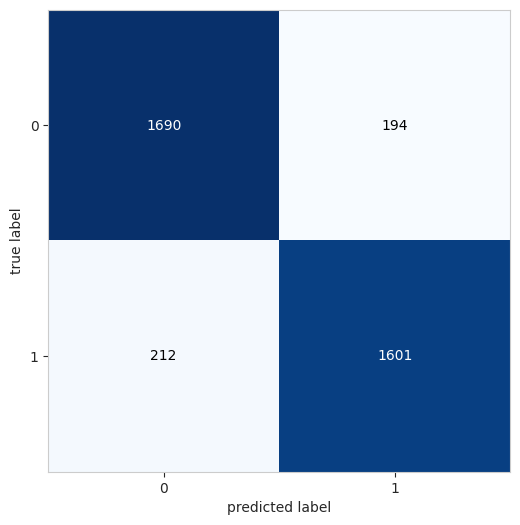

In [ ]:
# prompt: XGBoost (Extreme Gradient Boosting)

# Import necessary libraries
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# ... (previous code remains unchanged)

# # Caso 2: Gradient Boosting Machines (GBM)

# Create and train the XGBoost model
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred_xgb = xgb_model.predict(X_validation)


# Evaluate the XGBoost model
print(classification_report(y_validation, y_pred_xgb))

matriz_xgb = confusion_matrix(y_validation, y_pred_xgb)
plot_confusion_matrix(conf_mat=matriz_xgb, figsize=(6,6), show_normed=False)


- El rendimiento del modelo Extreme Gradient Boosting (XGBoost) en el conjunto de validación es el siguiente:

- Presicion: 0.89 (89%)

- Promedio macro (Macro AVG): 0.89

- Promedio ponderado (weighted avg): 0.89

- Verdaderos Negativos = 1690
- Verdaderos Positivos = 1601
- Falso Negativo = 212
- Falso Positivo = 194

-El modelo XGBoost tuvo un mejor desempeño en términos de presicion en comparación con el Random Forest Clasified en el conjunto de validación.

In [ ]:
# Calcular la varianza
varianza = np.array(y_validation) - np.array(y_pred_xgb)

# Calcular los iconos (mayor o menor)
iconos2 = ['▼' if real > 0 else '▲' for real in varianza]

# Crear el DataFrame
df = pd.DataFrame({'Real': y_validation, 'Predicho': y_pred_xgb, 'Varianza': varianza, 'Icono': iconos})

# Mostrar la tabla
df

,Real,Predicho,Varianza,Icono
2534,0,0,0,▲
7324,1,0,1,▲
1157,0,0,0,▲
2812,1,1,0,▲
4936,0,0,0,▲
...,...,...,...,...
3023,1,1,0,▲
5418,0,0,0,▲
15947,1,1,0,▲
16360,0,0,0,▲


- Aquí está el diagrama de dispersión que visualiza los BikeBuyer reales frente a los previstos para el modelo XGBoost (XGB):
- Los puntos azules representan los BikeBuyer reales frente a los previstos para cada cliente en el conjunto de validación.



# De la comparación visual:

- RFC: La cantidad de Verdaderos positivos y verdaderos negativos 88%.

- XGB: La cantidad de Verdaderos positivos y verdaderos negativos 89%

- En resumen, según las métricas de rendimiento y las visualizaciones, el XGBoost parece haber tenido un mejor desempeño en el conjunto de validación en comparación con el modelo Randon Forest Clasified para este conjunto de datos y características en particular.

# Paso 5: evaluar
- La comparacion entre el modelo XGBosst y el modelo Random Forest Clasified,  se obtuvo mas precision con el metodo XGBosst, con un 89% de aciertos sobre si los clientes comprarian una bicicleta.

- 5.2 Consideraciones de implementación
- Antes de implementar un modelo en un entorno del mundo real, es fundamental considerar:

- Frecuencia de actualización del modelo: Es posible que los modelos necesiten un reentrenamiento periódico a medida que haya nuevos datos disponibles.

- Monitoreo del desempeño: monitoree continuamente el desempeño del modelo en el mundo real para detectar cualquier degradación.

- Explicabilidad: dependiendo del caso de uso, puede ser necesario explicar las predicciones del modelo a los usuarios finales.

- Escalabilidad: asegúrese de que la infraestructura pueda manejar la cantidad de predicciones requeridas, especialmente si se implementa en un entorno en línea.

- La finalización de la fase de "Evaluación" marca el final de nuestro recorrido completo por el proceso SEMMA para este conjunto de datos.

In [ ]:
import pickle

# Serialize and save the Random Forest model to a pickle file
rf_model_path = "XGBoost.pkl"
with open(rf_model_path, 'wb') as file:
    pickle.dump(rf_model, file)

rf_model_path

'random_forest_model.pkl'